In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import matplotlib.lines as mlines


In [2]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sv_file_loc = parent_dir + "/data/all_samples/concatenated-sv.csv" 

print(sv_file_loc)

/home/cm/Documents/bioinformatique/BILL2/repo/bill_projet/data/all_samples/concatenated-sv.csv


In [3]:
test_file = parent_dir + "/data/test_file.csv"

def write_test_file(df):
    with open(test_file, "w") as out_file:
        df.to_csv(test_file, sep = "\t", index = False)

In [4]:
df = pd.read_csv(sv_file_loc, sep = "\t")

In [5]:
df_time = df.copy()


#df_time["group"] = df_time["sample"].str.extract(r"-(\d+)$")
df_time["group"] = df_time["sample"].str.extract(r"-(\d+)$")
df_time['group'] = pd.to_numeric(df_time['group'], downcast='integer')

df_time["generation"] = df_time["sample"].str.extract(r"(\d+)-")
df_time['generation'] = pd.to_numeric(df_time['generation'], downcast='integer')


df_time = df_time.drop_duplicates(subset = ["REF", "ALT", "POS"])

with open(test_file, "w") as out_file:
    df_time.to_csv(test_file, sep = "\t", index = False)

In [6]:
df_time

,POS,sample,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,GENOTYPE-INFO,group,generation
0,1,P15-2,Sniffles2.DUP.6ADS0,N,<DUP>,59,PASS,PRECISE;SVTYPE=DUP;SVLEN=272677;END=272678;SUP...,GT:GQ:DR:DV,./.:0:0:0,2,15
1,11375,P15-2,Sniffles2.INS.1CS0,N,GTAAGTACATCAATTGTTTGACACATCAACT,60,GT,PRECISE;SVTYPE=INS;SVLEN=31;END=11375;SUPPORT=...,GT:GQ:DR:DV,1/1:60:0:572,2,15
2,16099,P15-2,Sniffles2.DEL.3BAS0,GTGTGTGTGT,N,60,PASS,PRECISE;SVTYPE=DEL;SVLEN=-10;END=16109;SUPPORT...,GT:GQ:DR:DV,0/1:60:339:196,2,15
3,16099,P15-2,Sniffles2.DEL.3BBS0,GTGTGTGTGTGTGTGTGTGTGTGT,N,60,GT,PRECISE;SVTYPE=DEL;SVLEN=-24;END=16123;SUPPORT...,GT:GQ:DR:DV,0/0:60:489:46,2,15
4,31256,P15-2,Sniffles2.DEL.3F0S0,CGTTCACGAAGACGGCTTGGAATACAT,N,60,PASS,PRECISE;SVTYPE=DEL;SVLEN=-27;END=31283;SUPPORT...,GT:GQ:DR:DV,1/1:60:3:318,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...
2405,177650,P65-4,Sniffles2.DEL.1F5S0,GAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGA...,N,60,PASS,IMPRECISE;SVTYPE=DEL;SVLEN=-80;END=177730;SUPP...,GT:GQ:DR:DV,0/1:60:34:50,4,65
2415,228198,P65-4,Sniffles2.INS.79S0,N,CTGAACAGAAAGAAAGCTCAGAAGTGAGATGGGCCAGAAGCACGAC...,60,PASS,PRECISE;SVTYPE=INS;SVLEN=74;END=228198;SUPPORT...,GT:GQ:DR:DV,1/1:60:0:92,4,65
2418,231446,P65-4,Sniffles2.INS.7DS0,N,CTCTACCTGGTT,60,PASS,PRECISE;SVTYPE=INS;SVLEN=12;END=231446;SUPPORT...,GT:GQ:DR:DV,1/1:60:0:114,4,65
2420,240022,P65-4,Sniffles2.DEL.259S0,CCAGCAGCTGCTCC,N,60,PASS,PRECISE;SVTYPE=DEL;SVLEN=-14;END=240036;SUPPOR...,GT:GQ:DR:DV,0/1:60:69:31,4,65


In [7]:
df_groups = []

for group_no in range(1,11):
    a_df = df_time[df_time["group"] == group_no]
    df_groups.append(a_df)
    a_df = df_time.copy()

df_groups[5]

,POS,sample,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,GENOTYPE-INFO,group,generation
156,11375,P65-6,Sniffles2.INS.DS0,N,GTAAGTACAAATTGTTTGACACATCAACT,60,PASS,PRECISE;SVTYPE=INS;SVLEN=29;END=11375;SUPPORT=...,GT:GQ:DR:DV,0/1:60:183:60,6,65
157,11384,P65-6,Sniffles2.DEL.FES0,TCAATTGTTTGACACATCAACTGTAAGTACATC,N,60,PASS,PRECISE;SVTYPE=DEL;SVLEN=-33;END=11417;SUPPORT...,GT:GQ:DR:DV,1/1:60:37:213,6,65
158,16096,P65-6,Sniffles2.DEL.10CS0,TGAGTGTGTGTGTGTGTGTG,N,60,GT,PRECISE;SVTYPE=DEL;SVLEN=-20;END=16116;SUPPORT...,GT:GQ:DR:DV,0/0:60:274:33,6,65
159,16097,P65-6,Sniffles2.DEL.10BS0,GAGTGTGTGTGT,N,60,PASS,PRECISE;SVTYPE=DEL;SVLEN=-12;END=16109;SUPPORT...,GT:GQ:DR:DV,0/1:60:172:135,6,65
160,22620,P65-6,Sniffles2.INS.20S0,N,GTGTAGTGGTGTAGTGGTGTAGTGGTGTAT,60,GT,IMPRECISE;SVTYPE=INS;SVLEN=32;END=22620;SUPPOR...,GT:GQ:DR:DV,0/0:60:164:10,6,65
...,...,...,...,...,...,...,...,...,...,...,...,...
2247,216485,P90-6,Sniffles2.INS.1CES0,N,<INS>,60,GT,IMPRECISE;SVTYPE=INS;SVLEN=71;END=216485;SUPPO...,GT:GQ:DR:DV,0/0:60:1649:12,6,90
2254,231446,P90-6,Sniffles2.INS.1FDS0,N,ACCTACCTGGTC,59,GT,PRECISE;SVTYPE=INS;SVLEN=12;END=231446;SUPPORT...,GT:GQ:DR:DV,1/1:60:0:2026,6,90
2260,256462,P90-6,Sniffles2.INS.23AS0,N,GTGCTTGGTGTGGTTGGGGTCGAAGTCGTACTTGGAGTTG,60,GT,PRECISE;SVTYPE=INS;SVLEN=40;END=256462;SUPPORT...,GT:GQ:DR:DV,0/0:60:1558:228,6,90
2261,256522,P90-6,Sniffles2.INS.238S0,N,<INS>,60,GT,PRECISE;SVTYPE=INS;SVLEN=13;END=256522;SUPPORT...,GT:GQ:DR:DV,0/0:60:1778:15,6,90


In [43]:
"""colors = ['red', 'blue', 'green', 'purple', 'orange', "magenta", "black", "pink", "grey", "brown"]


n = 0
for i in df_groups:
    a_df = i.sort_values(by = "generation")["generation"].value_counts().sort_index()
    plt.plot(a_df.index, a_df.values, marker='o', linestyle='-', color = colors[n], label = str("Échantillon " + str(n+1)))
    #plt.text(a_df.index[-1], a_df.values[-1], s = str("Échantillon" + str(n+1)), fontsize=13, color=colors[n])
    n+=1


font1 = {'family':'serif','color':'black','size':20}    

plt.xlabel("Nombre de générations", fontdict = font1)
plt.ylabel("Nombre de mutations", fontdict = font1)


plt.legend(loc = "upper left", fontsize = 17) 

plt.rcParams['figure.figsize'] = [20, 10]"""

'colors = [\'red\', \'blue\', \'green\', \'purple\', \'orange\', "magenta", "black", "pink", "grey", "brown"]\n\n\nn = 0\nfor i in df_groups:\n    a_df = i.sort_values(by = "generation")["generation"].value_counts().sort_index()\n    plt.plot(a_df.index, a_df.values, marker=\'o\', linestyle=\'-\', color = colors[n], label = str("Échantillon " + str(n+1)))\n    #plt.text(a_df.index[-1], a_df.values[-1], s = str("Échantillon" + str(n+1)), fontsize=13, color=colors[n])\n    n+=1\n\n\nfont1 = {\'family\':\'serif\',\'color\':\'black\',\'size\':20}    \n\nplt.xlabel("Nombre de générations", fontdict = font1)\nplt.ylabel("Nombre de mutations", fontdict = font1)\n\n\nplt.legend(loc = "upper left", fontsize = 17) \n\nplt.rcParams[\'figure.figsize\'] = [20, 10]'

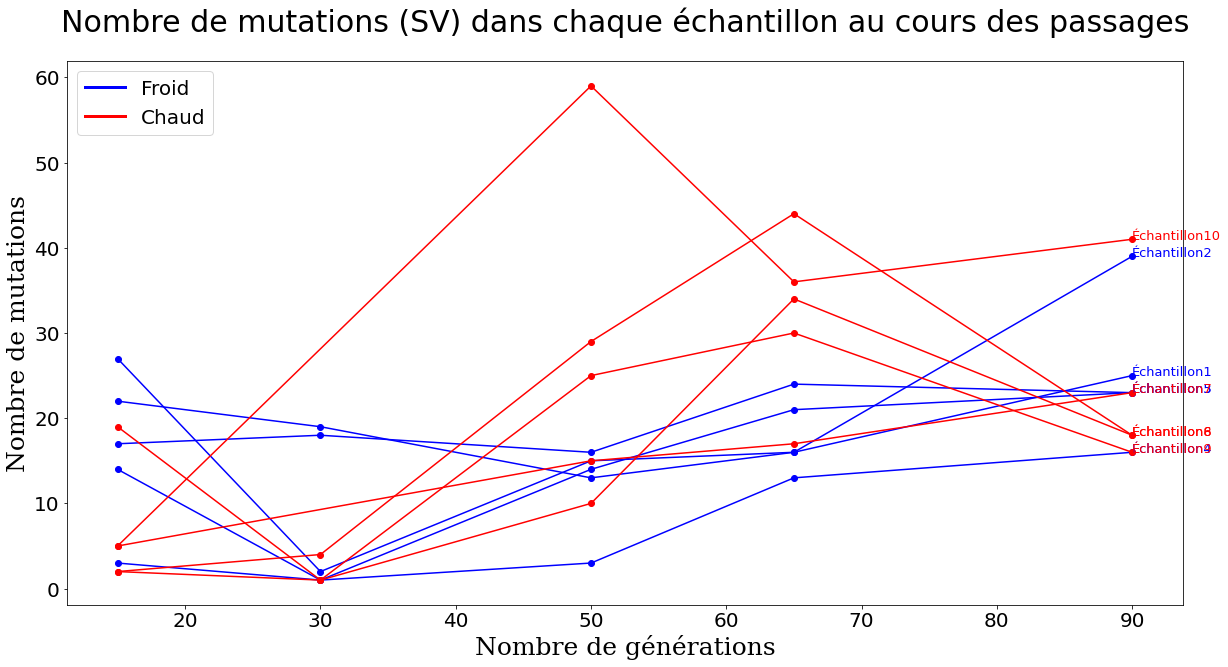

In [49]:
list1 = ["blue"]*5
list2 = ["red"]*5
colors = list1+list2

n = 0
for i in df_groups:
    a_df = i.sort_values(by = "generation")["generation"].value_counts().sort_index()
    plt.plot(a_df.index, a_df.values, marker='o', linestyle='-', color = colors[n])
    plt.text(a_df.index[-1], a_df.values[-1], s = str("Échantillon" + str(n+1)), fontsize=13, color=colors[n])
    n+=1


font1 = {'family':'serif','color':'black','size':25}    

plt.xlabel("Nombre de générations", fontdict = font1)
plt.ylabel("Nombre de mutations", fontdict = font1)

cold_line = mlines.Line2D([], [], color='blue', label="Froid", linewidth=3)
hot_line = mlines.Line2D([], [], color='red', label="Chaud", linewidth=3)


plt.legend(handles=[cold_line, hot_line], loc="upper left", fontsize=20)
plt.title("Nombre de mutations (SV) dans chaque échantillon au cours des passages", fontsize = 30, pad = 30)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)


plt.rcParams['figure.figsize'] = [20, 10]

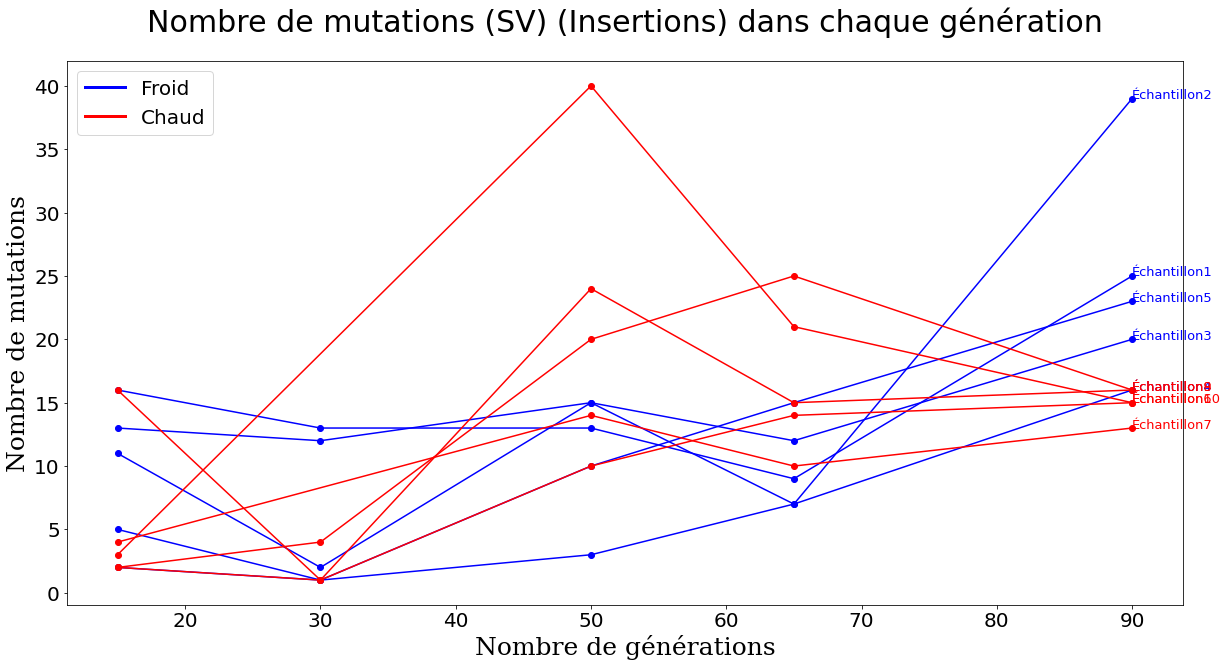

In [45]:
list1 = ["blue"]*5
list2 = ["red"]*5
colors = list1+list2

n = 0
for i in df_groups:
    df_insertion = i[i["REF"] == "N"]
    a_df = df_insertion.sort_values(by = "generation")["generation"].value_counts().sort_index()
    plt.plot(a_df.index, a_df.values, marker='o', linestyle='-', color = colors[n])
    plt.text(a_df.index[-1], a_df.values[-1], s = str("Échantillon" + str(n+1)), fontsize=13, color=colors[n])
    n+=1


font1 = {'family':'serif','color':'black','size':25}    

plt.xlabel("Nombre de générations", fontdict = font1)
plt.ylabel("Nombre de mutations", fontdict = font1)

cold_line = mlines.Line2D([], [], color='blue', label="Froid", linewidth=3)
hot_line = mlines.Line2D([], [], color='red', label="Chaud", linewidth=3)


plt.legend(handles=[cold_line, hot_line], loc="upper left", fontsize=20)
plt.title("Nombre de mutations (SV) (Insertions) dans chaque génération", fontsize = 30, pad = 30)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)


plt.rcParams['figure.figsize'] = [20, 10]

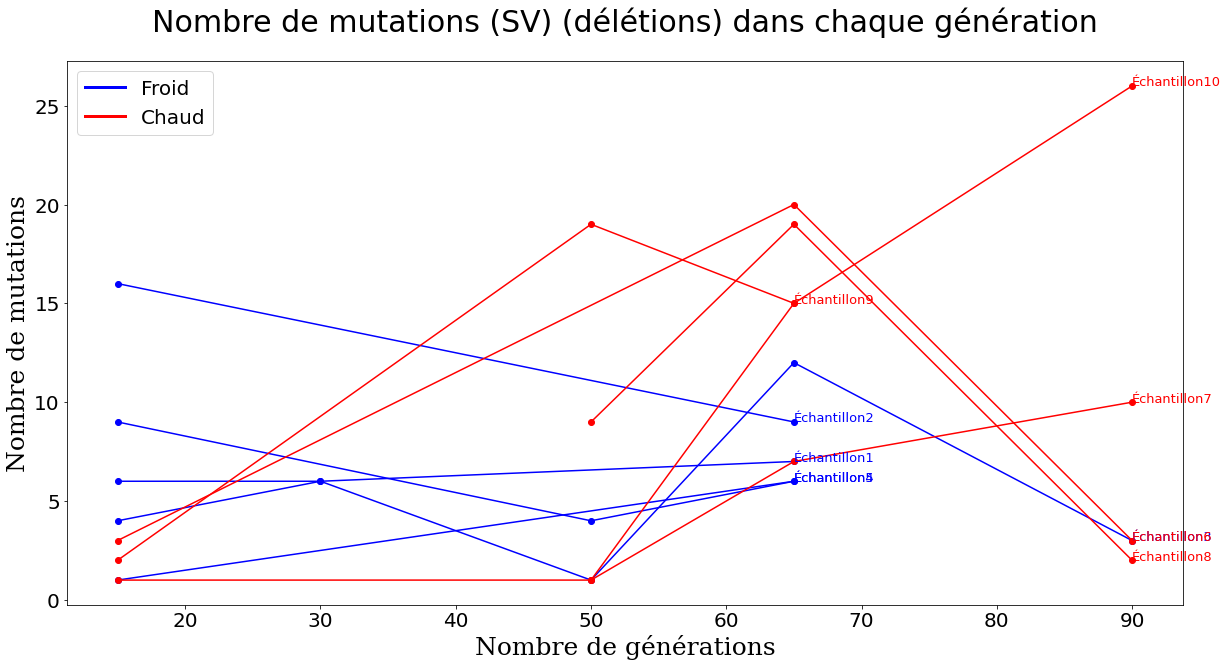

In [46]:
list1 = ["blue"]*5
list2 = ["red"]*5
colors = list1+list2

n = 0
for i in df_groups:
    df_insertion = i[i["REF"] != "N"]
    a_df = df_insertion.sort_values(by = "generation")["generation"].value_counts().sort_index()
    plt.plot(a_df.index, a_df.values, marker='o', linestyle='-', color = colors[n])
    plt.text(a_df.index[-1], a_df.values[-1], s = str("Échantillon" + str(n+1)), fontsize=13, color=colors[n])
    n+=1


font1 = {'family':'serif','color':'black','size':25}    

plt.xlabel("Nombre de générations", fontdict = font1)
plt.ylabel("Nombre de mutations", fontdict = font1)

cold_line = mlines.Line2D([], [], color='blue', label="Froid", linewidth=3)
hot_line = mlines.Line2D([], [], color='red', label="Chaud", linewidth=3)


plt.legend(handles=[cold_line, hot_line], loc="upper left", fontsize=20)
plt.title("Nombre de mutations (SV) (délétions) dans chaque génération", fontsize = 30, pad = 30)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)


plt.rcParams['figure.figsize'] = [20, 10]

# Échantillon individus

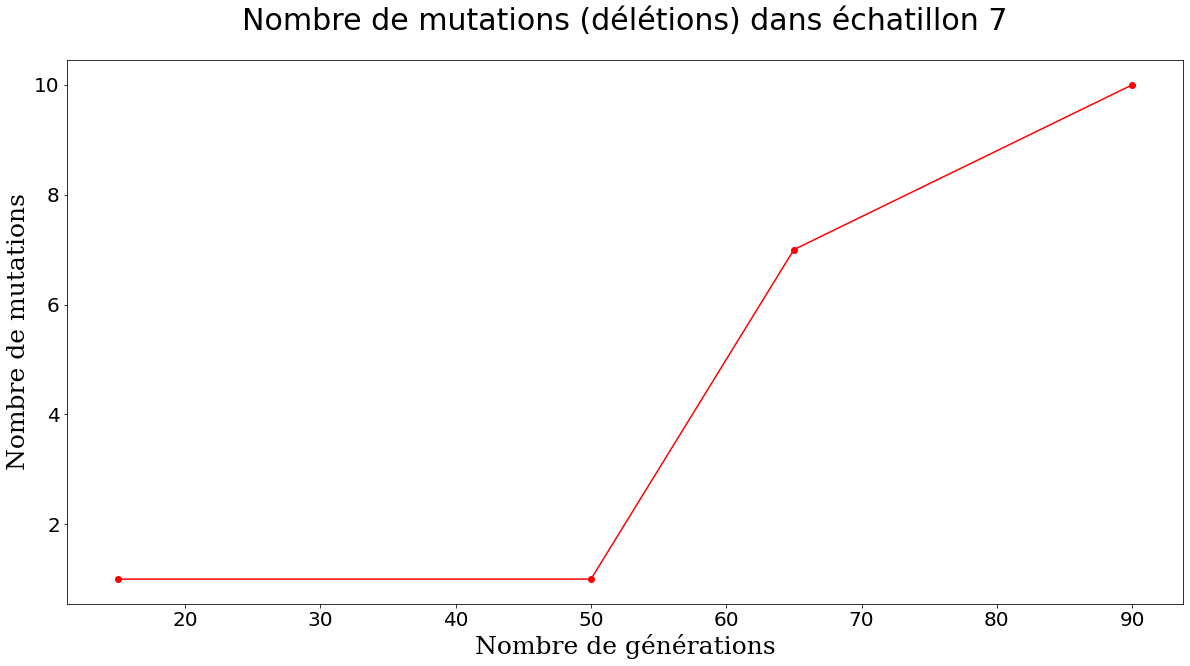

In [42]:
list1 = ["blue"]*5
list2 = ["red"]*5
colors = list1+list2

n = 0
e = 7
i = df_groups[e-1]

df_insertion = i[i["REF"] != "N"]
a_df = df_insertion.sort_values(by = "generation")["generation"].value_counts().sort_index()
plt.plot(a_df.index, a_df.values, marker='o', linestyle='-', color = colors[e-1])
n+=1


font1 = {'family':'serif','color':'black','size':25}    

plt.xlabel("Nombre de générations", fontdict = font1)
plt.ylabel("Nombre de mutations", fontdict = font1)



plt.title("Nombre de mutations (délétions) dans échatillon " + str(e), fontsize = 30, pad = 30)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)


plt.rcParams['figure.figsize'] = [20, 10]